<a href="https://colab.research.google.com/github/ZaichenkoNA/Stat_Prac/blob/main/Dz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1
Implement serial test and apply to a `samples`

Idea: break the sequence $x_1, x_2, x_3, ..., x_{2n}$ into consecutive series of length $2$: $(x_1, x_2), (x_3, x_4), ..., (x_{2n-1}, x_{2n})$ and look at each element as a random and independent point in $2D$ space. Next, apply chi-square. Similarly, one can construct series of length $3, 4$, etc.

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def serial_test_chi2(samples, d=2, bins=10):

    # Формирование серий длины d
    series = np.array([samples[i:i + d] for i in range(0, len(samples) - d + 1, d)])

    # Дискретизация: переводим значения в индексы ячеек
    series_discrete = np.floor(series * bins).astype(int)

    # Подсчет количества вхождений каждой ячейки
    unique, counts = np.unique([tuple(x) for x in series_discrete], axis=0, return_counts=True)
    observed_freq = np.zeros((bins,) * d)

    for (idxs, count) in zip(unique, counts):
        observed_freq[tuple(idxs)] = count

    # Ожидаемая частота (равномерное распределение)
    expected_freq = np.full((bins,) * d, len(series) / (bins ** d))

    # Применяем критерий хи-квадрат
    chi2_stat, p_value = stats.chisquare(f_obs=observed_freq.flatten(), f_exp=expected_freq.flatten())
    return chi2_stat, p_value


# Применение серийного теста
np.random.seed(42)
sample_data = np.random.rand(1000)
chi2_stat, p_val = serial_test_chi2(sample_data)
print(f"Chi-square statistic: {chi2_stat:.4f}, p-value: {p_val:.4f}")


Chi-square statistic: 98.4000, p-value: 0.4981


### Problem 2*
Implement permutation test and apply to a `samples`

We again decompose the sequence $x_1, x_2, x_3, ..., x_{dn}$ into consecutive series of length $d$: $(x_1, ..., x_d), (x_{d+1}, x_{2d+d}), \ldots, (x_{nd-d+1}, x_{nd})$. A series of $d$ elements can be ordered in $d!$ ways and each way of ordering is equally probable. Hence the idea of the test is to count how many times each ordering occurs among $n$ series and apply the $\chi^2$ test.

In [ ]:
import numpy as np
import itertools
import scipy.stats as stats

def permutation_test(samples, d):
    if len(samples) < d:
        raise ValueError("Выборка слишком мала для формирования серий")

    n = len(samples) // d
    series = np.array([samples[i * d:(i + 1) * d] for i in range(n)])

    # Генерируем все возможные перестановки индексов
    permutations = list(itertools.permutations(range(d)))
    perm_dict = {perm: i for i, perm in enumerate(permutations)}

    # Подсчет встречаемости перестановок
    observed_counts = np.zeros(len(permutations))
    for s in series:
        sorted_indices = tuple(np.argsort(s))
        observed_counts[perm_dict[sorted_indices]] += 1

    expected_counts = np.full(len(permutations), n / len(permutations))

    # Применяем критерий хи-квадрат
    chi2_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)
    return chi2_stat, p_value, observed_counts

# Генерация случайных данных
np.random.seed(42)
sample_data = np.random.rand(1000)
chi2_stat, p_val, observed = permutation_test(sample_data, d=3)
print(f"Chi-square statistic: {chi2_stat:.4f}, p-value: {p_val:.4f}")


Chi-square statistic: 3.3423, p-value: 0.6474


### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [9]:
import numpy as np
import scipy.stats as stats


def rng_bad(m=2**31, a=65539, c=0):
    if not hasattr(rng_bad, 'current'):
        rng_bad.current = 1
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m

# Функция для генерации последовательности чисел
def generate_sequence(f, n):
    sequence = [f() for _ in range(n)]
    return sequence

# Тест для плохого генератора
chi2_stat_bad, p_value_bad = serial_test_chi2(generate_sequence(rng_bad, 1000))
print(f"Bad RNG: Chi2 Statistic = {chi2_stat_bad}, p-value = {p_value_bad}")

# Тест для хорошего генератора
chi2_stat_good, p_value_good = serial_test_chi2(np.random.rand(1000))
print(f"Good RNG: Chi2 Statistic = {chi2_stat_good}, p-value = {p_value_good}")



Bad RNG: Chi2 Statistic = 127.60000000000001, p-value = 0.028022620756608132
Good RNG: Chi2 Statistic = 104.79999999999998, p-value = 0.3257868689989199


### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

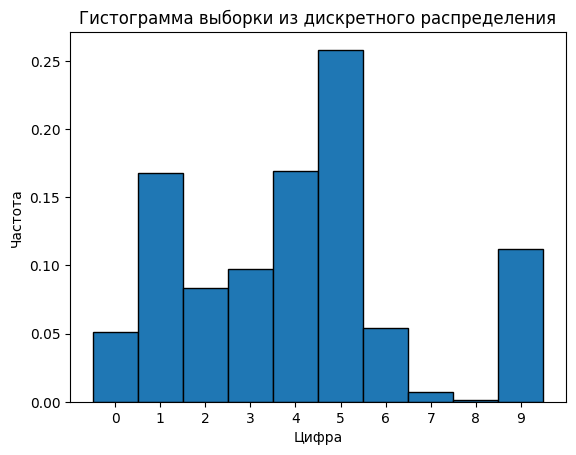

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

digits = np.arange(10)
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

# Сортировка по весам для улучшения выборки
sorted_indices = np.argsort(weights)[::-1]
sorted_digits = digits[sorted_indices]
sorted_weights = weights[sorted_indices]

sorted_weights /= sorted_weights.sum() # Нормализация весов
sample = np.random.choice(sorted_digits, size=1000, p=sorted_weights)

# Построение гистограммы
plt.hist(sample, bins=np.arange(11) - 0.5, edgecolor='black', density=True)
plt.title("Гистограмма выборки из дискретного распределения")
plt.xlabel("Цифра")
plt.ylabel("Частота")
plt.xticks(sorted_digits)
plt.show()


### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

The following proposition is the idea behind the *inverse transform* method:

If $\xi$ has a uniform distribution in $[0,1]$, then $F^{-1}(\xi)$ is distributed according to the law of $F$. (For which $F$ is this true?)

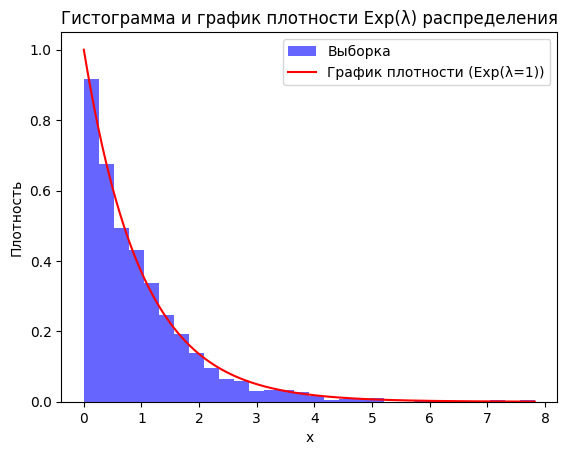

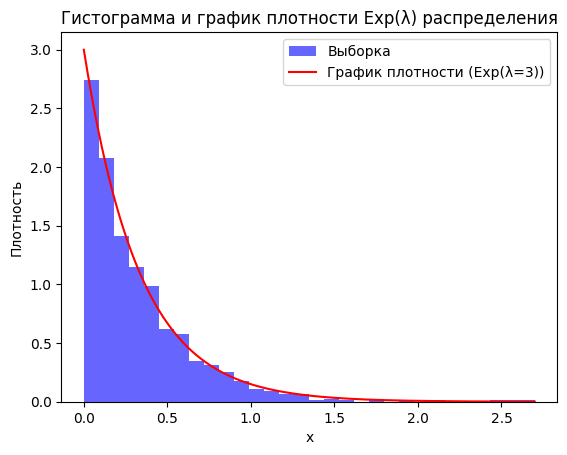

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def inverse_transform_exp(l):
  uniform_samples = np.random.rand(1000)
  exp_samples = -np.log(1 - uniform_samples) / l

  # Построение гистограммы выборки
  plt.hist(exp_samples, bins=30, density=True, color='b', alpha= 0.6, label='Выборка')

  # Построение точной плотности распределения Exp(λ)
  x_values = np.linspace(0, np.max(exp_samples), 1000)
  density_values = l * np.exp(-l * x_values)

  plt.plot(x_values, density_values, 'r-', label=f'График плотности (Exp(λ={l}))')
  plt.title('Гистограмма и график плотности Exp(λ) распределения')
  plt.xlabel('x')
  plt.ylabel('Плотность')
  plt.legend(loc='upper right')
  plt.show()


inverse_transform_exp(1)
inverse_transform_exp(3)



### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

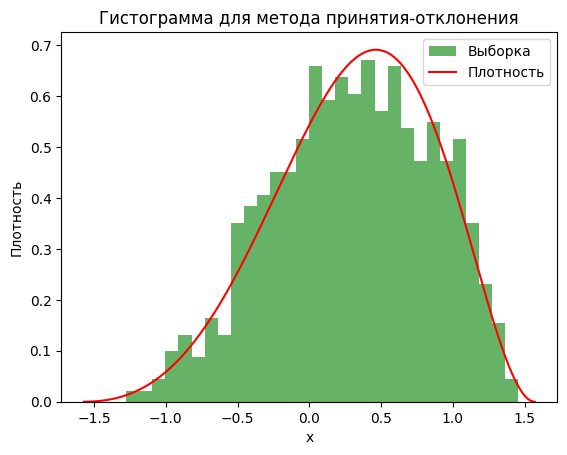

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def unnormalized_density(x):
    return np.exp(x) * np.cos(x)**2

# Вычислим нормировочную константу
integral, error = quad(unnormalized_density, -np.pi/2, np.pi/2)
C = 1 / integral

def density(x):
    return C * unnormalized_density(x)

# Метод принятия-отклонения
samples = []
while len(samples) < 1000:
    x = np.random.uniform(-np.pi/2, np.pi/2)
    y = np.random.uniform(0, 1 / np.pi)*2
    if y <= density(x):
        samples.append(x)

samples = np.array(samples)

# Построение гистограммы выборки
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Выборка')

# Построение точной плотности
x_values = np.linspace(-np.pi/2, np.pi/2, 1000)
density_values = density(x_values)

plt.plot(x_values, density_values, 'r-', label='Плотность')
plt.title('Гистограмма для метода принятия-отклонения')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend(loc='upper right')
plt.show()


### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

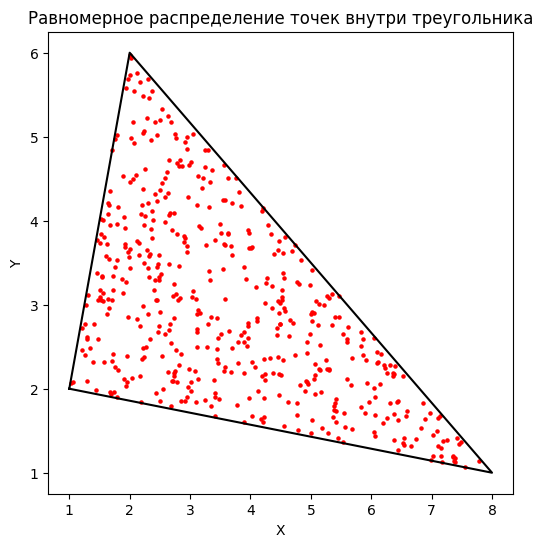

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points_in_triangle(n_points):
    A = np.array([1, 2])
    B = np.array([2, 6])
    C = np.array([8, 1])

    points = []

    for _ in range(n_points):
        u = np.random.rand()
        v = np.random.rand()

        # Если u + v > 1, то точка не попадёт в треугольник, поэтому меняем их на (1 - u) и (1 - v)
        if u + v > 1:
            u = 1 - u
            v = 1 - v

        # Вычисляем координаты точки внутри треугольника с помощью барицентрических координат
        x = (1 - u - v) * A[0] + u * B[0] + v * C[0]
        y = (1 - u - v) * A[1] + u * B[1] + v * C[1]

        points.append([x, y])

    return np.array(points)


points = generate_points_in_triangle(500)
plt.figure(figsize=(6, 6))
plt.plot([1, 2, 8, 1], [2, 6, 1, 2], 'k-')
plt.scatter(points[:, 0], points[:, 1], color='r', s=5)
plt.title('Равномерное распределение точек внутри треугольника')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Будем генерировать два случайных числа u и v из отрезка [0,1].
Далее воспользуемся барицентрическими координатами: Любую точку P в треугольнике можно представить в виде P = a*P_a + b*P_b + c*P_c, где (P_a,P_b,P_c) координаты вершин треугольника. При этом a+b+c=1.

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

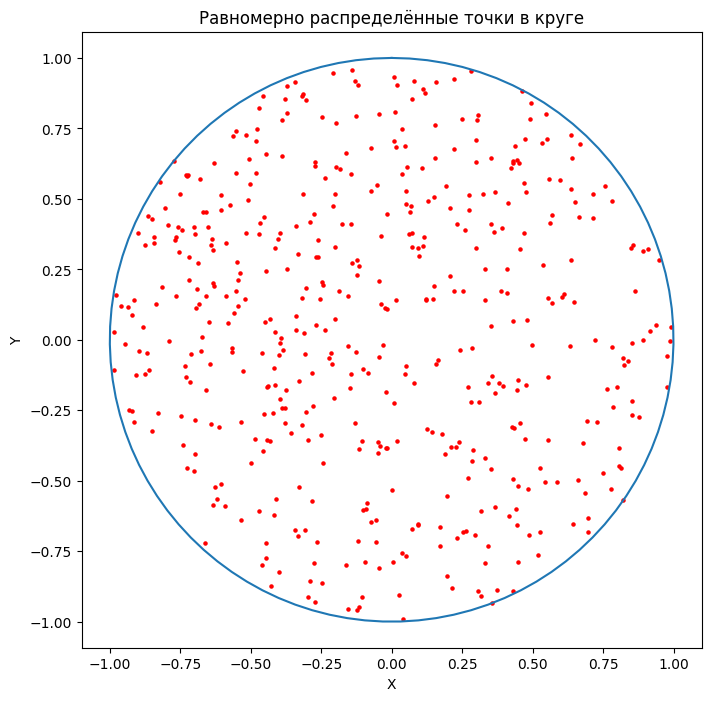

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайного угла theta (от 0 до 2π)
theta = np.random.uniform(0, 2 * np.pi, 500)

# Генерация радиуса r с учетом равномерного распределения по площади
r = np.sqrt(np.random.uniform(0, 1, 500))

x = r * np.cos(theta)
y = r * np.sin(theta)

plt.figure(figsize=(8, 8))
plt.scatter(x, y, color='r', s=5)
t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.title('Равномерно распределённые точки в круге')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Увеличение площади круга A есть dA = 2pi * rdr. То есть при увеличении r вероятность попадения точки на окружность радиуса r уменьшается. Поэтому у случайной величины, которая отвечает за точки плотность f должна быть f = 2*r. По 5 задаче тогда r = F^-1(U) = sqrt(U).

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

Выборочное среднее: 
[4.0654233  6.82402714]
Выборочная ковариационная матрица: 
[[20.89305392 -5.32101796]
 [-5.32101796 40.31501607]]


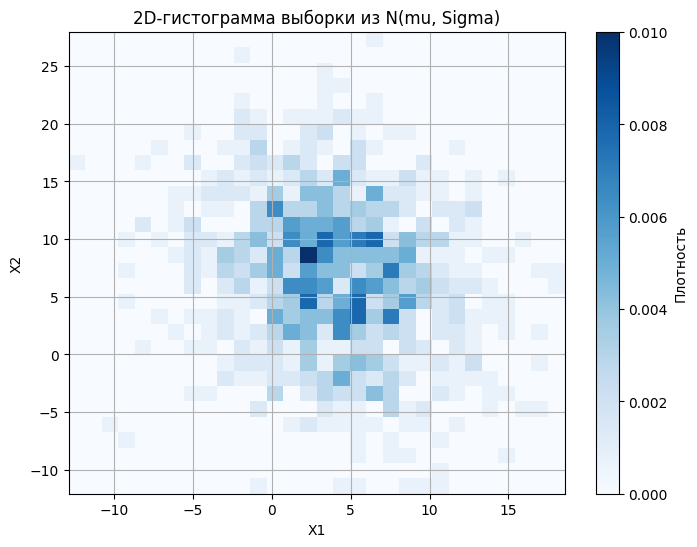

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Функция генерации двух независимых стандартных нормальных величин
def box_muller_modified(n_samples):
    samples = []
    while len(samples) < n_samples:
        U, V = np.random.uniform(-1, 1, 2)
        S = U**2 + V**2
        if S >= 1 or S == 0:  # Отбрасываем точки, которые попадают за круг
            continue
        factor = np.sqrt(-2 * np.log(S) / S)
        samples.append(U * factor)
        samples.append(V * factor)
    return np.array(samples[:n_samples])  # Убираем лишние значения (если n_samples нечетное)


mu = np.array([4, 7])
Sigma = np.array([[20, -4], [-4, 40]])

# Разложение Холецкого ковариационной матрицы
L = np.linalg.cholesky(Sigma)

Z = box_muller_modified(2 * 1000).reshape(1000, 2)
X = mu + Z @ L.T  # Преобразование в N(mu, Sigma)

sample_mean = np.mean(X, axis=0)
sample_cov = np.cov(X, rowvar=False)

print(f"Выборочное среднее: \n{sample_mean}")
print(f"Выборочная ковариационная матрица: \n{sample_cov}")

plt.figure(figsize=(8, 6))
plt.hist2d(X[:, 0], X[:, 1], bins=30, cmap='Blues', density=True)
plt.colorbar(label="Плотность")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("2D-гистограмма выборки из N(mu, Sigma)")
plt.grid(True)
plt.show()


Для генерации 2 независимых стандартных нормальных величин воспользуемся Marsaglia’s polar method. Также воспользуемся разложением Холецкого для ковариационной матрицы, чтобы применить свойство Cov(ZL) = L * Cov(Z) * L.T